In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Africa_1997-2020_Jan08.csv', encoding = 'latin1')

In [4]:
df.head(2).T

,0,1
ISO,12,12
EVENT_ID_CNTY,ALG1,ALG2
EVENT_ID_NO_CNTY,1,2
EVENT_DATE,01-janvier-1997,02-janvier-1997
YEAR,1997,1997
TIME_PRECISION,1,1
EVENT_TYPE,Violence against civilians,Violence against civilians
SUB_EVENT_TYPE,Attack,Attack
ACTOR1,GIA: Armed Islamic Group,GIA: Armed Islamic Group
ASSOC_ACTOR_1,NaN,NaN


In [5]:
df.shape

(65535, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   EVENT_ID_CNTY     65535 non-null  object
 2   EVENT_ID_NO_CNTY  65535 non-null  int64 
 3   EVENT_DATE        65535 non-null  object
 4   YEAR              65535 non-null  int64 
 5   TIME_PRECISION    65535 non-null  int64 
 6   EVENT_TYPE        65535 non-null  object
 7   SUB_EVENT_TYPE    65535 non-null  object
 8   ACTOR1            65535 non-null  object
 9   ASSOC_ACTOR_1     12768 non-null  object
 10  INTER1            65535 non-null  int64 
 11  ACTOR2            50346 non-null  object
 12  ASSOC_ACTOR_2     11167 non-null  object
 13  INTER2            65535 non-null  int64 
 14  INTERACTION       65535 non-null  int64 
 15  REGION            65535 non-null  object
 16  COUNTRY           65535 non-null  object
 17  ADMIN1      

In [7]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else: num.append(i)
print(cat)

['EVENT_ID_CNTY', 'EVENT_DATE', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'ASSOC_ACTOR_1', 'ACTOR2', 'ASSOC_ACTOR_2', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'SOURCE', 'SOURCE_SCALE', 'NOTES']


In [8]:
df[cat].nunique().sort_values()

REGION                5
EVENT_TYPE            6
COUNTRY              20
SOURCE_SCALE         23
SUB_EVENT_TYPE       25
ADMIN1              317
ACTOR2             1402
ACTOR1             1645
ADMIN2             1832
ASSOC_ACTOR_1      1866
ASSOC_ACTOR_2      2069
ADMIN3             2672
SOURCE             4129
EVENT_DATE         8244
LOCATION           8381
NOTES             55547
EVENT_ID_CNTY     65535
dtype: int64

In [10]:
(df.isnull().sum()/df.shape[0] * 100)[df.isnull().sum() > 0 ] #percentage of missing values

ASSOC_ACTOR_1    80.517281
ACTOR2           23.176928
ASSOC_ACTOR_2    82.960250
ADMIN3           20.148013
NOTES             3.973449
dtype: float64

In [11]:
list(df['NOTES'].iloc[:5].values)

['5 January: Beheading of 5 citizens in Douaouda (Tipaza).',
 'Two citizens were beheaded in Hassasna.',
 'Two citizens were killed in a raid on the village of Hassi El Abd. Several televisions were destroyed and the school of the village burned.',
 '4 January: 16 citizens were murdered in the village of Benachour (Blida) by masked men a few hundred meters away from a military camp. It is of note that the citizens of this village had refused to set up armed militias.',
 '5 January: Killing of 18 citizens in the Oliviers district of Douaouda (Tipaza). Among the victims are 3 children and 6 women. This region had refused to organise armed militias.']

In [13]:
# dr_df = df.drop(columns = ['EVENT_ID_CNTY', 'ASSOC_ACTOR_1', 'ASSOC_ACTOR_2'])

<Axes: xlabel='REGION'>

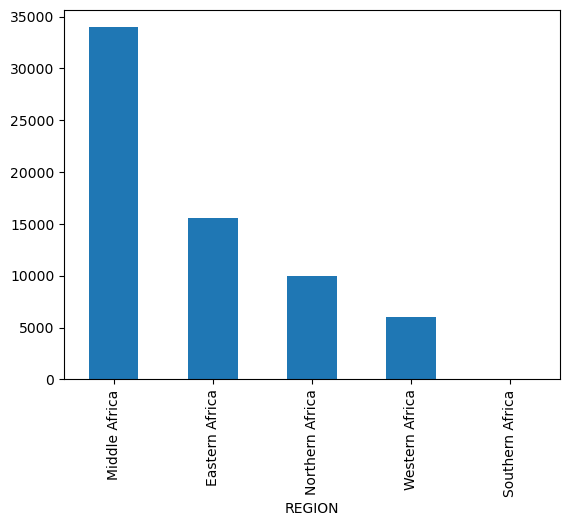

In [22]:
dr_df['REGION'].value_counts().plot(kind = 'bar')

In [25]:
dr_df[['REGION']].groupby('REGION')['REGION'].count()

REGION
Eastern Africa     15592
Middle Africa      33945
Northern Africa     9936
Southern Africa       77
Western Africa      5985
Name: REGION, dtype: int64

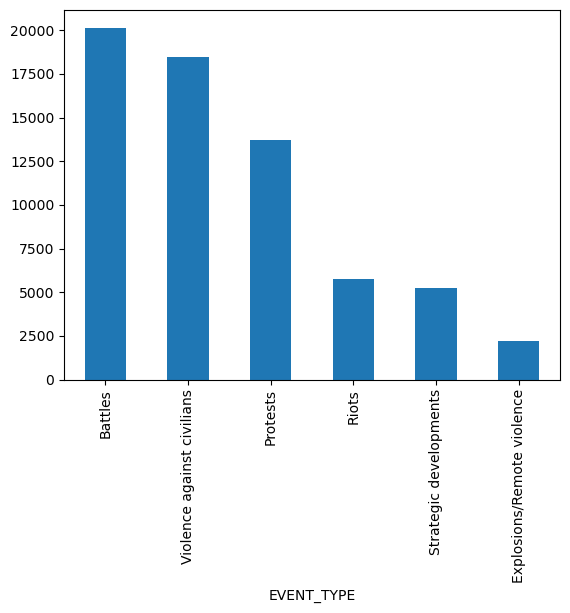

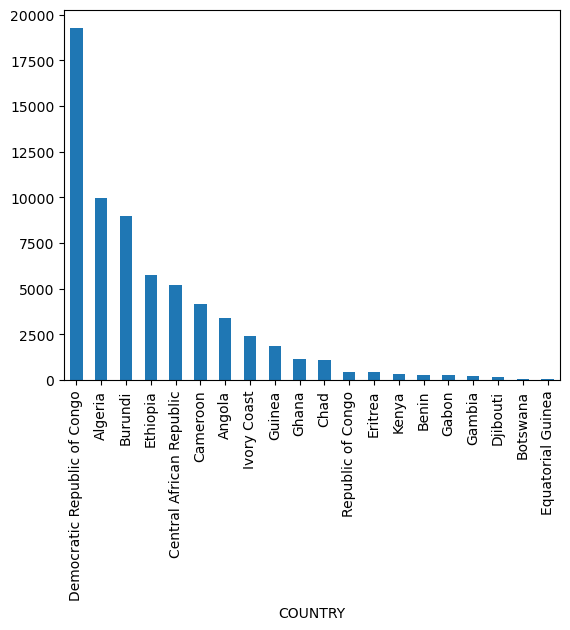

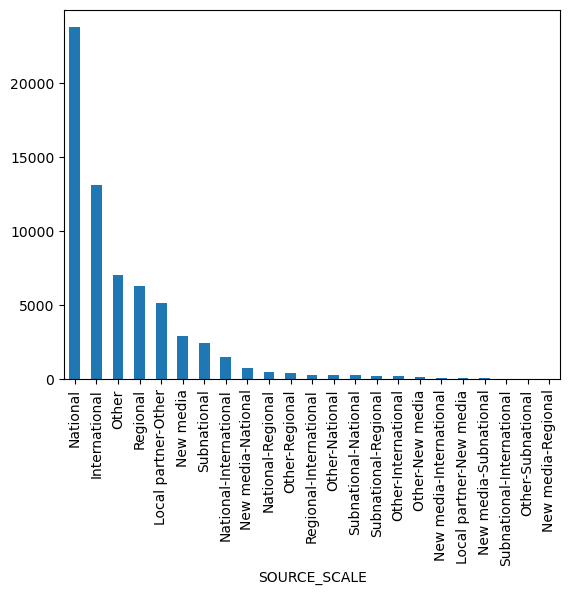

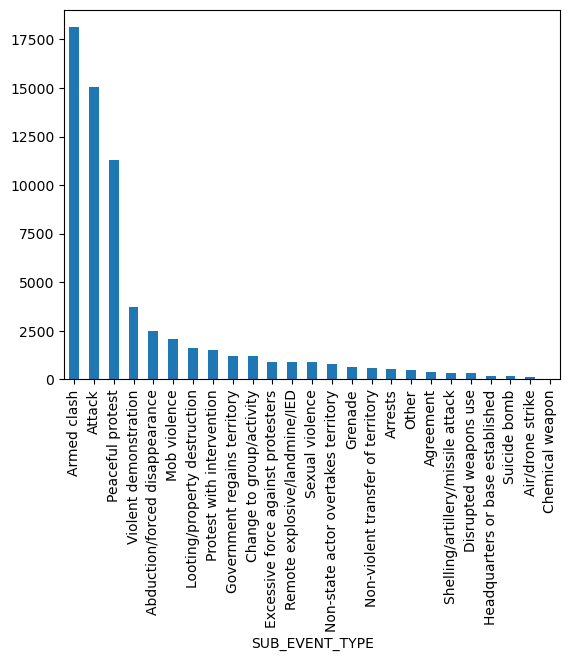

In [40]:
dr_df['EVENT_TYPE'].value_counts().plot(kind = 'bar')
plt.show()
dr_df['COUNTRY'].value_counts().plot(kind = 'bar')
plt.show()
dr_df['SOURCE_SCALE'].value_counts().plot(kind = 'bar')
plt.show()
dr_df['SUB_EVENT_TYPE'].value_counts().plot(kind = 'bar')
plt.show()


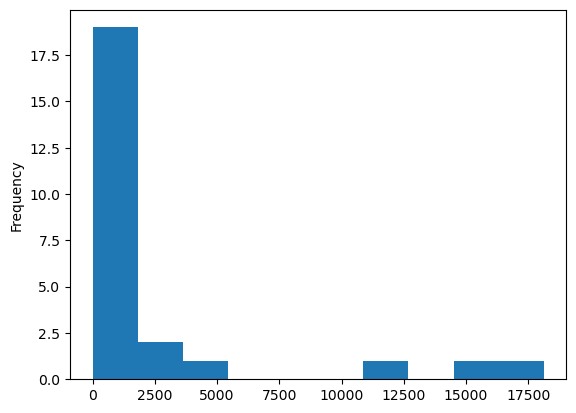

In [42]:
dr_df['SUB_EVENT_TYPE'].value_counts().plot(kind = 'hist')
plt.show()